# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [133]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
#import pandas_profiling
#pandas_profiling.ProfileReport(df)

In [134]:
#from pandas_profiling import ProfileReport (es un error porque la versión que tengo de python localmente es muy reciente, para eso mejor debo probar con un entorno virtual)

## Establecer apariencia general de los gráficos

In [135]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)
pd.set_option("display.precision",1) # esta es configuración mia
t = (6,6)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [136]:
df = palmerpenguins.load_penguins_raw()

df.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.9,-24.7,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.4,-25.3,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.8,-25.3,NaN


#### Datos previamente procesados

In [137]:
preprocess_df = palmerpenguins.load_penguins()
preprocess_df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Utilizando los conjuntos de datos de `seaborn`

In [138]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Utilizando la interfaz de `Deepnote`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [139]:
pre_penguin_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
pre_penguin_df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [140]:
pre_penguin_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [141]:
(
    pre_penguin_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [142]:
pre_penguin_df.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [143]:
(
    pre_penguin_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [144]:
(
    pre_penguin_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [145]:
(
    pre_penguin_df
    .isnull()
    .sum()
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

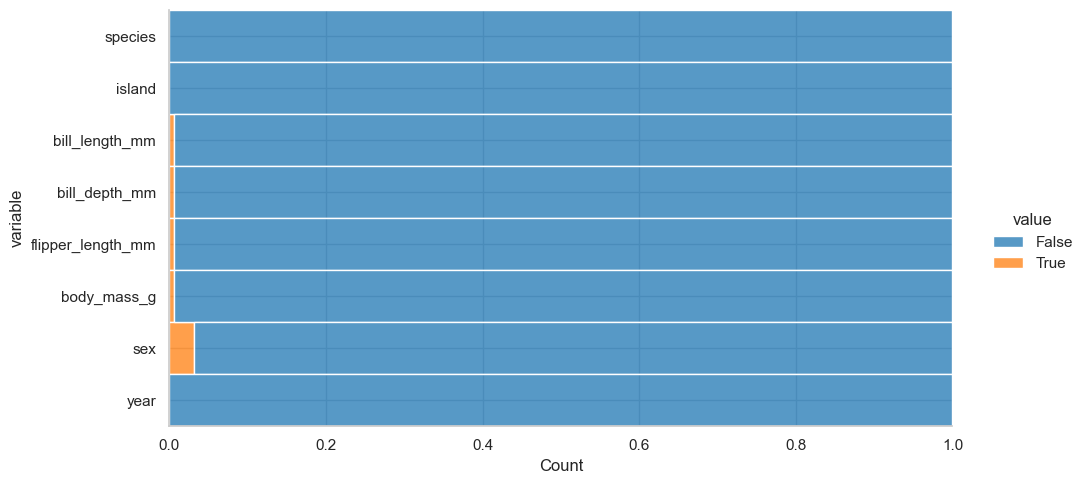

In [146]:
(
    pre_penguin_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
);

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

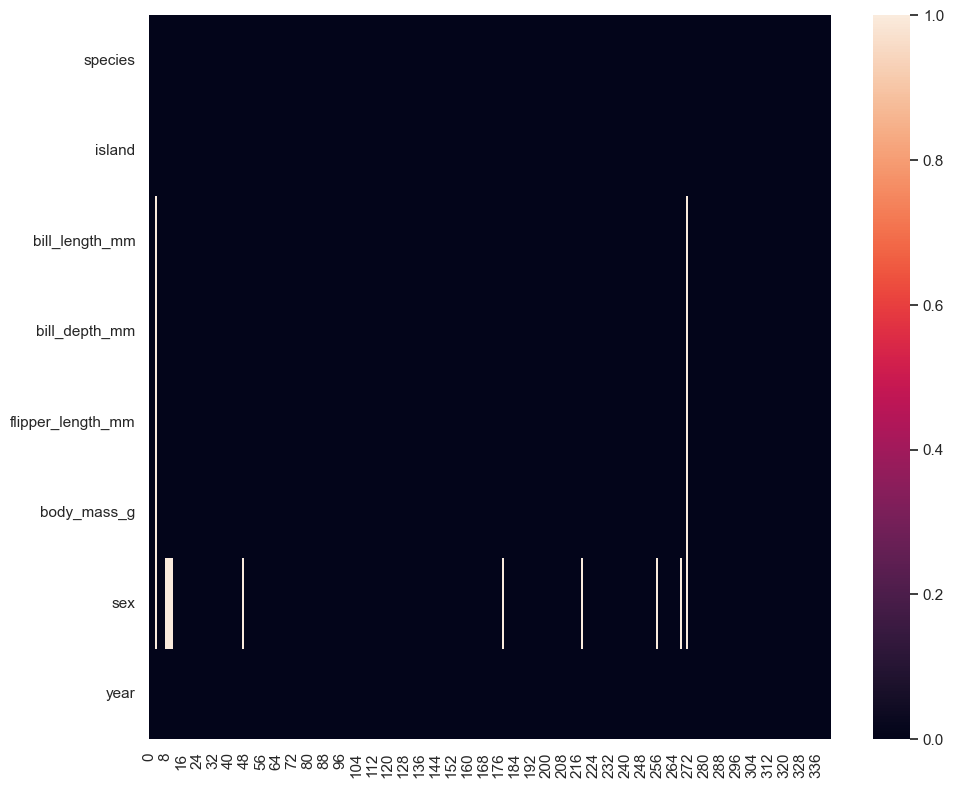

In [147]:
(
    pre_penguin_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
            )
        )
    
    )
);

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [148]:
pre_proces_pg_df = (
    pre_penguin_df
    .dropna()
)

pre_proces_pg_df.head(5)
# pasa de 344 a 333 (se pierden 11 filas)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [149]:
pre_proces_pg_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.0,333.0,333.0,333.0,333,333.0
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,44.0,17.2,201.0,4207.1,NaN,2008.0
std,NaN,NaN,5.5,2.0,14.0,805.2,NaN,0.8
min,NaN,NaN,32.1,13.1,172.0,2700.0,NaN,2007.0
25%,NaN,NaN,39.5,15.6,190.0,3550.0,NaN,2007.0
50%,NaN,NaN,44.5,17.3,197.0,4050.0,NaN,2008.0
75%,NaN,NaN,48.6,18.7,213.0,4775.0,NaN,2009.0


### Solo las numéricas

In [150]:
pre_proces_pg_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.0,333.0,333.0,333.0,333.0
mean,44.0,17.2,201.0,4207.1,2008.0
std,5.5,2.0,14.0,805.2,0.8
min,32.1,13.1,172.0,2700.0,2007.0
25%,39.5,15.6,190.0,3550.0,2007.0
50%,44.5,17.3,197.0,4050.0,2008.0
75%,48.6,18.7,213.0,4775.0,2009.0
max,59.6,21.5,231.0,6300.0,2009.0


### Solo categóricas - 1

In [151]:
pre_proces_pg_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [152]:
(
    pre_proces_pg_df
    .astype({
        'species': 'category',
        'island' : 'category',
        'sex' : 'category'
    })
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## ¿Cómo visualizar los conteos?

### Pandas

In [153]:
(
    pre_proces_pg_df
    .species
    .value_counts()
)

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

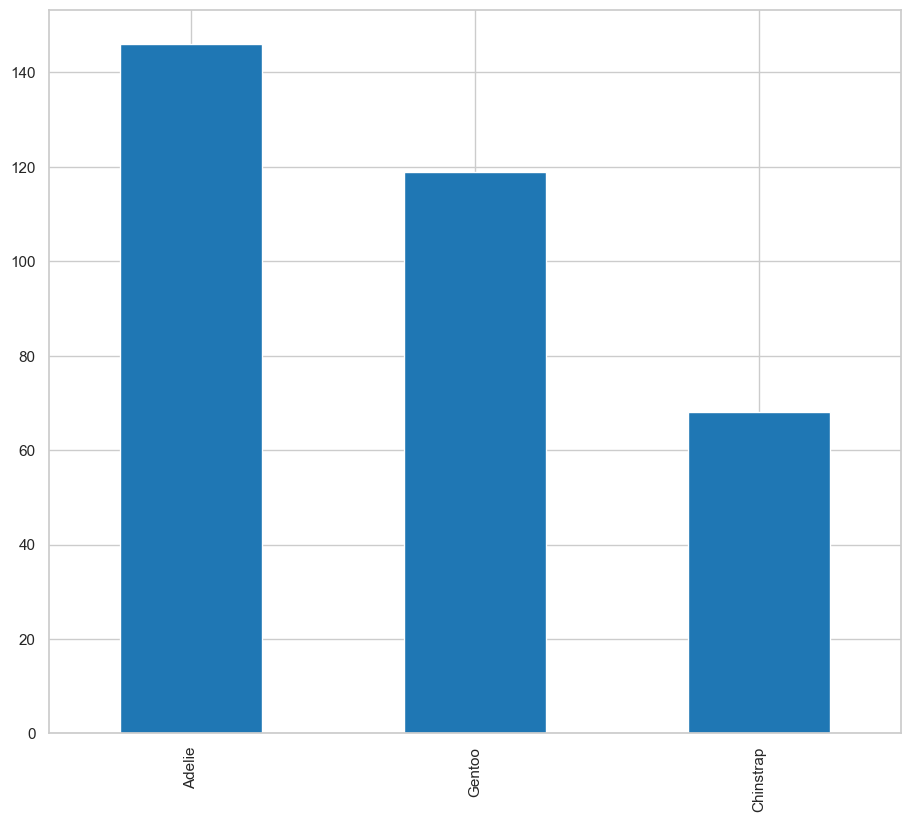

In [154]:
(
    pre_proces_pg_df
    .species
    .value_counts()
    .plot(kind='bar')
);

### Seaborn

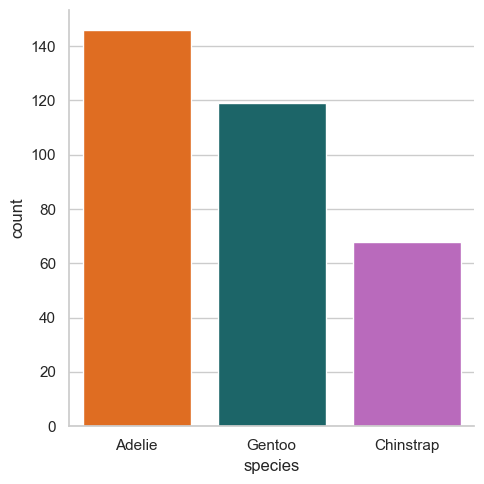

In [155]:
sns.catplot(
    data=pre_proces_pg_df,
    x='species',
    kind='count',
    palette=penguin_color
);

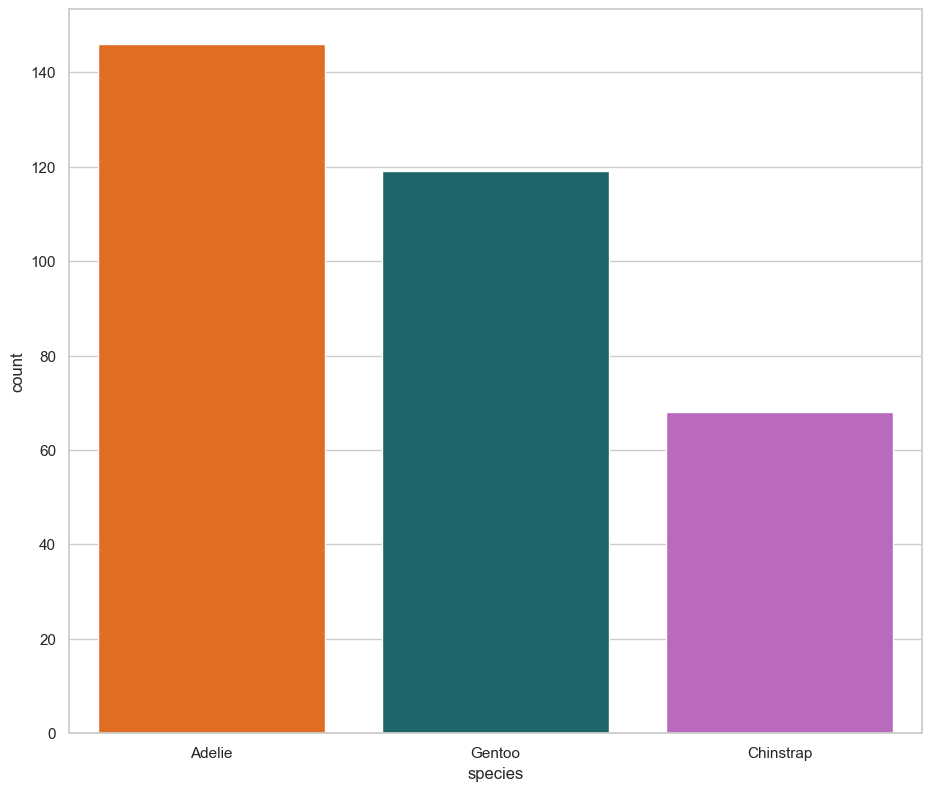

In [156]:
(
    pre_proces_pg_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color
            )
        )
    )
);

### ¿Cómo visualizar las proporciones?

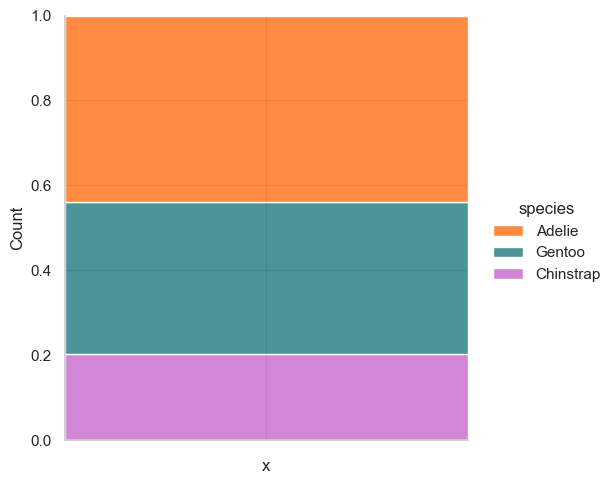

In [157]:
(
    pre_proces_pg_df
    .add_column('x', '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
);

# Medidas de tendencia central

## Media o promedio

## Mediana

## Moda

# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [158]:
pre_penguin_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [159]:
pre_penguin_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [160]:
pre_penguin_df.max(numeric_only=True) - pre_penguin_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [161]:
pre_penguin_df.std(numeric_only=True)

bill_length_mm         5.5
bill_depth_mm          2.0
flipper_length_mm     14.1
body_mass_g          802.0
year                   0.8
dtype: float64

In [162]:
pre_penguin_df.mean(numeric_only=True)

bill_length_mm         43.9
bill_depth_mm          17.2
flipper_length_mm     200.9
body_mass_g          4201.8
year                 2008.0
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [163]:
pre_penguin_df.quantile(0.75)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9244\1976650142.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pre_penguin_df.quantile(0.75)


bill_length_mm         48.5
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4750.0
year                 2009.0
Name: 0.75, dtype: float64

In [164]:
pre_penguin_df.quantile(0.25)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9244\540973832.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pre_penguin_df.quantile(0.25)


bill_length_mm         39.2
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [165]:
pre_penguin_df.quantile(0.75) - pre_penguin_df.quantile(0.25)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9244\1559532247.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pre_penguin_df.quantile(0.75) - pre_penguin_df.quantile(0.25)


bill_length_mm          9.3
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1200.0
year                    2.0
dtype: float64

In [166]:
(
    pre_penguin_df
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df: df[0.75] - df[0.25]
    )
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9244\2650761930.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  .quantile(q=[0.75, 0.50, 0.25])


,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.5,44.5,39.2,9.3
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4750.0,4050.0,3550.0,1200.0
4,year,2009.0,2008.0,2007.0,2.0


## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

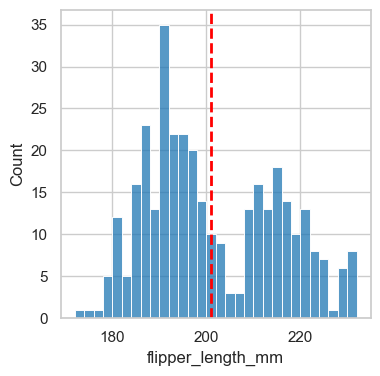

In [167]:
plt.figure(figsize=(4,4))

sns.histplot(
    data=pre_penguin_df,
    x='flipper_length_mm',
    binwidth=2
)

plt.axvline(
    x=pre_penguin_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.show()

### Diagrama de caja / boxplot

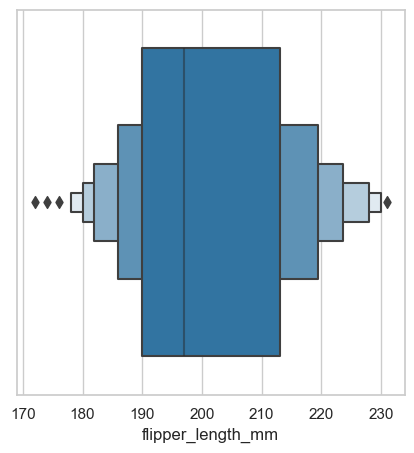

In [168]:
plt.figure(figsize=(5,5))

sns.boxenplot(
    pre_penguin_df,
    x='flipper_length_mm'
    )

plt.show()

### Limitaciones

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

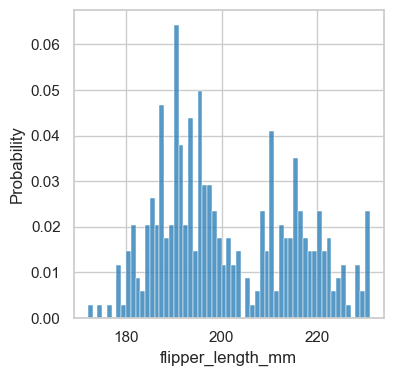

In [169]:
plt.figure(figsize=(4,4))

sns.histplot(
    data=pre_penguin_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
);

# esto es un PMF

### Utilizando `empiricaldist`

In [170]:
pmf_flipper_length = empiricaldist.Pmf.from_seq(
    pre_penguin_df.flipper_length_mm,
    normalize=True
)

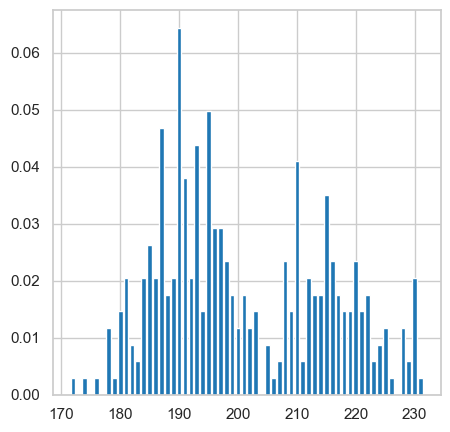

In [171]:
plt.figure(figsize=(5,5))

pmf_flipper_length.bar()

In [172]:
pmf_flipper_length(190) # probabilidad de encontrar un pinguino con una lungitud de alas de 190 mm

0.06432748538011696

In [173]:
pre_penguin_df.flipper_length_mm.max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

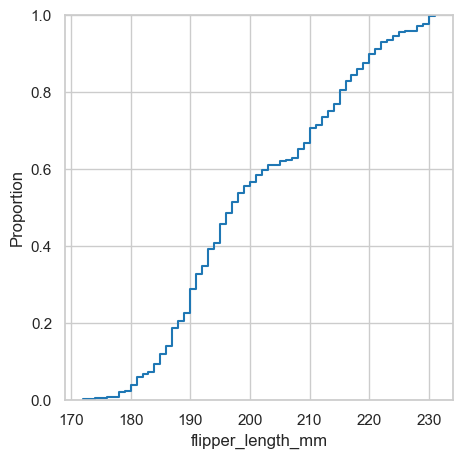

In [174]:
plt.figure(figsize=(5,5))

sns.ecdfplot(
    data=pre_penguin_df,
    x='flipper_length_mm'
)

### Utilizando `empiricaldist`

In [175]:
cdf_flipper_length = empiricaldist.Cdf.from_seq(
    pre_penguin_df.flipper_length_mm,
    normalize=True
)

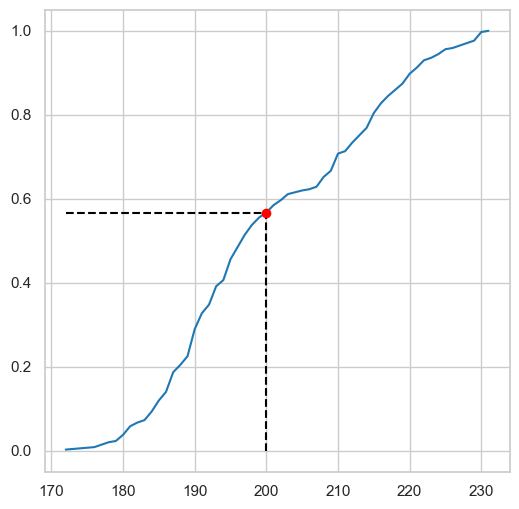

In [176]:
plt.figure(figsize=(6,6))

cdf_flipper_length.plot()

q = 200 # encontrar un pinguino que tenga 200 o menos
p = cdf_flipper_length.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color = 'black',
    linestyles='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length.qs[0],
    xmax=q,
    color='black',
    linestyles='dashed'
)

plt.plot(q, p, 'ro');

### Comparando distribuciones

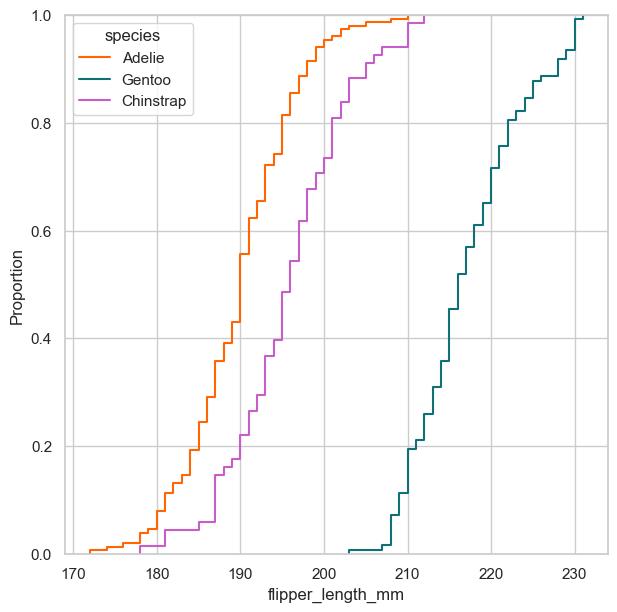

In [177]:
plt.figure(figsize=(7,7))

sns.ecdfplot(
    data=pre_penguin_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
);

### 1 Commit GIT

## Funciones de densidad de probabilidad

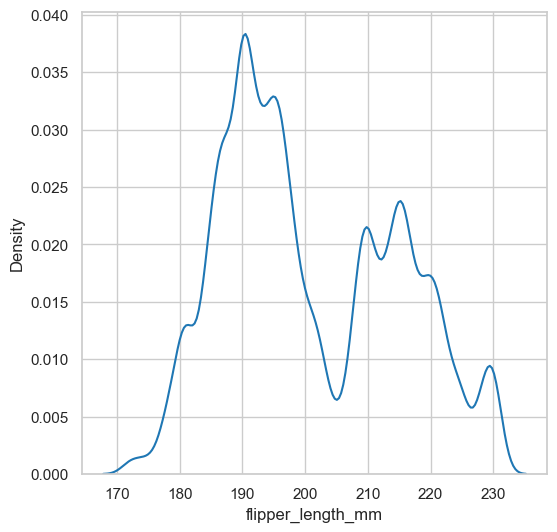

In [178]:
plt.figure(figsize=t)

sns.kdeplot(
    data=pre_penguin_df,
    x='flipper_length_mm',
    bw_method=0.1
)

plt.show()

In [179]:
stats = pre_penguin_df.body_mass_g.describe()
stats

count     342.0
mean     4201.8
std       802.0
min      2700.0
25%      3550.0
50%      4050.0
75%      4750.0
max      6300.0
Name: body_mass_g, dtype: float64

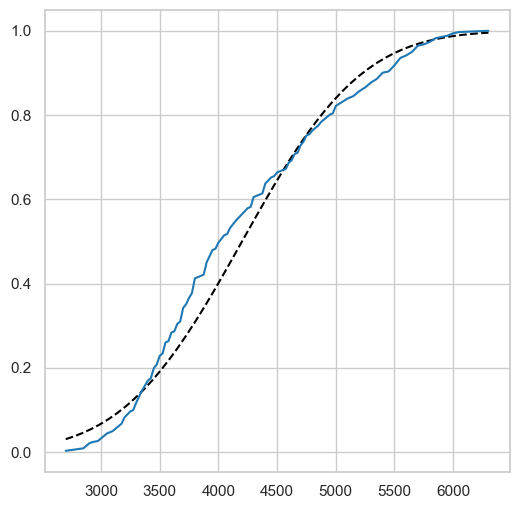

In [180]:
# generar un vector:

plt.figure(figsize=t)

xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
ys

plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    pre_penguin_df.body_mass_g,
    normalize=True
).plot()

plt.show()

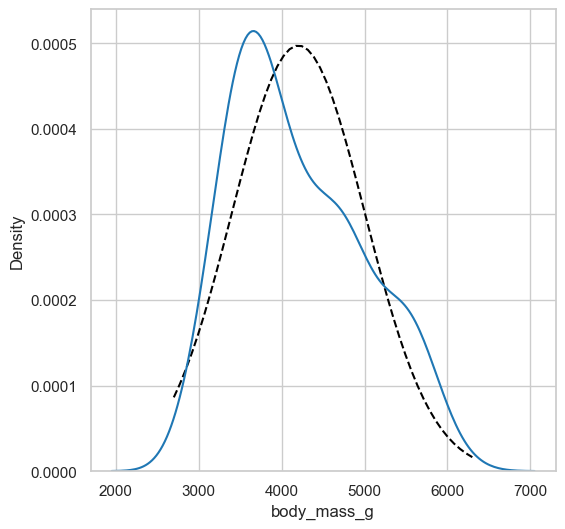

In [181]:
plt.figure(figsize=t)

xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
ys

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=pre_penguin_df,
    x='body_mass_g'
)

plt.show()

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

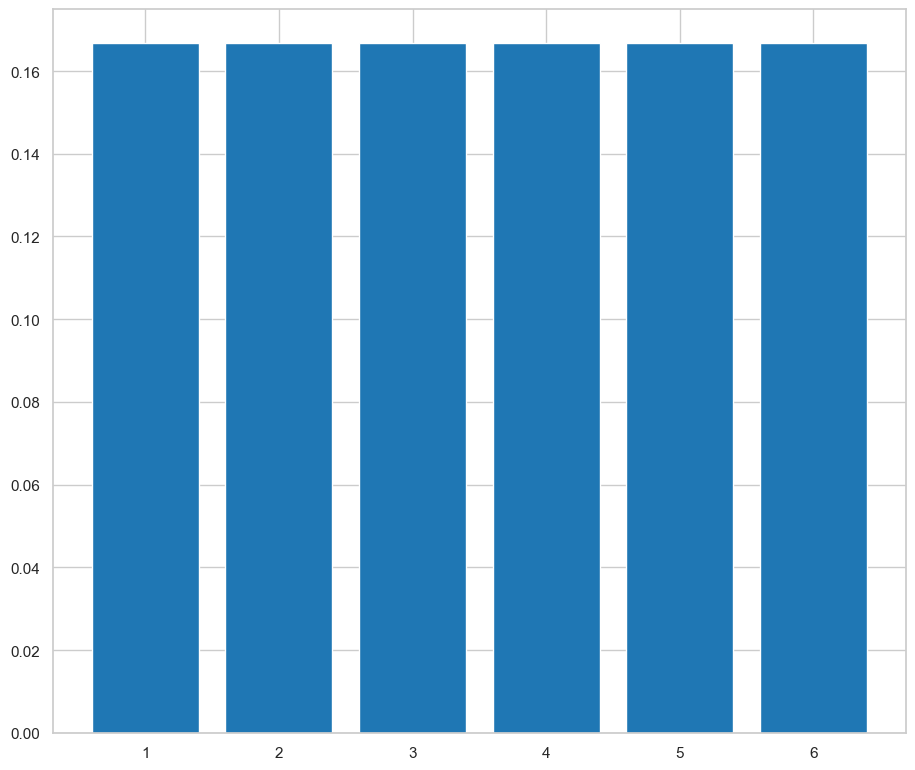

In [182]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

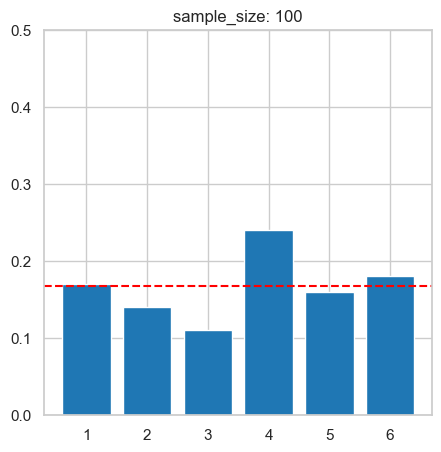

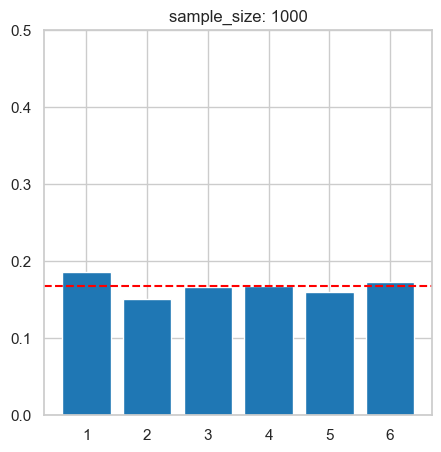

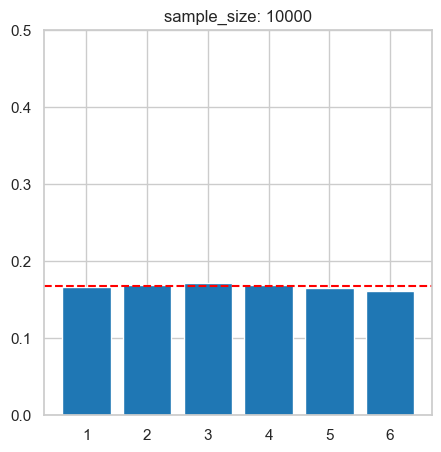

In [183]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color='red', linestyle='dashed')
    plt.ylim([0,0.50])
    plt.title(f'sample_size: {sample_size}')

## Teorema del Límite Central

In [184]:
pre_penguin_df.sex.value_counts(normalize=True)

male      0.5
female    0.5
Name: sex, dtype: float64

<AxesSubplot: >

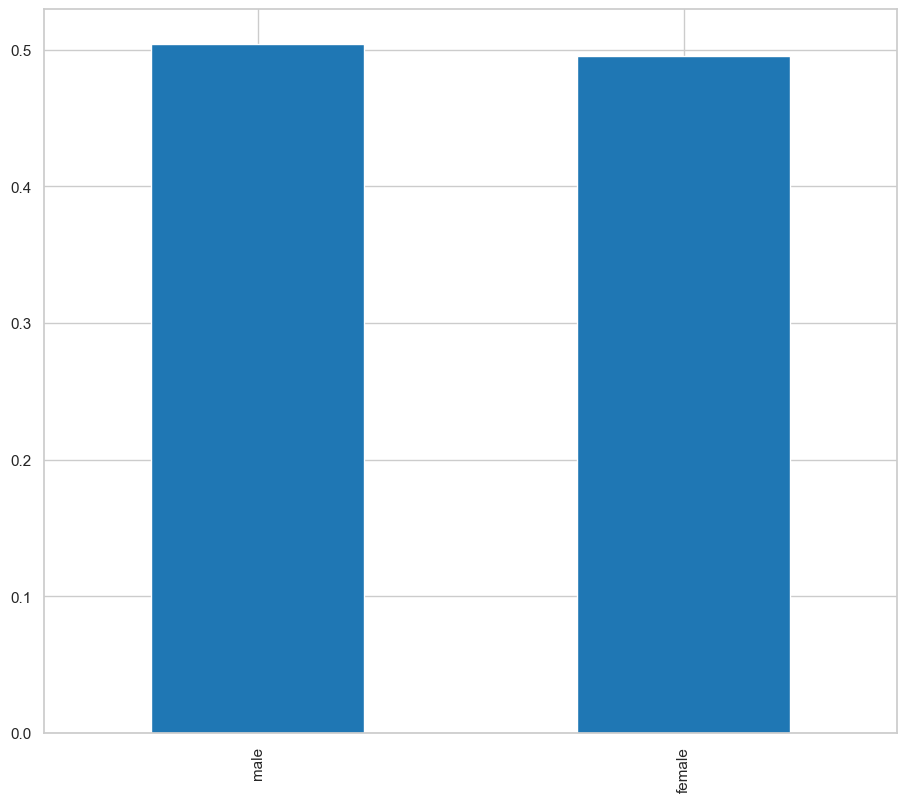

In [185]:
pre_penguin_df.sex.value_counts(normalize=True).plot(kind='bar')

In [186]:
sex_numeric = pre_penguin_df.sex.replace(['male', 'female'], [1, 0])

In [187]:
#number_samples = 1000
#sample_size=35

#sample_df = pd.DataFrame()

#np.random.seed(42)
#for i in range(1, number_samples + 1):
#    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
#    sample_name = f"sample_{i}"
#    sample_df[sample_name] = sex_numeric_sample

#male_population_mean = sample_df.mean().mean()
##print(f"Estimated porcentaje of male penguins in population is: {male_population_mean * 100:.4f}%")


# Estableciendo relaciones: Gráfica de puntos

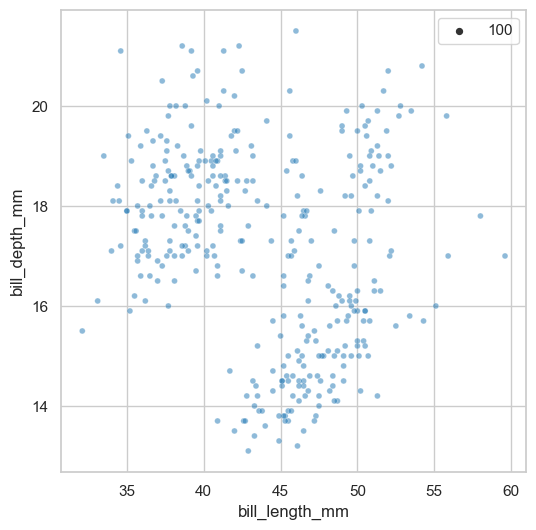

In [188]:
plt.figure(figsize=t)

sns.scatterplot(
    data=pre_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    size=100
);

<Figure size 600x600 with 0 Axes>

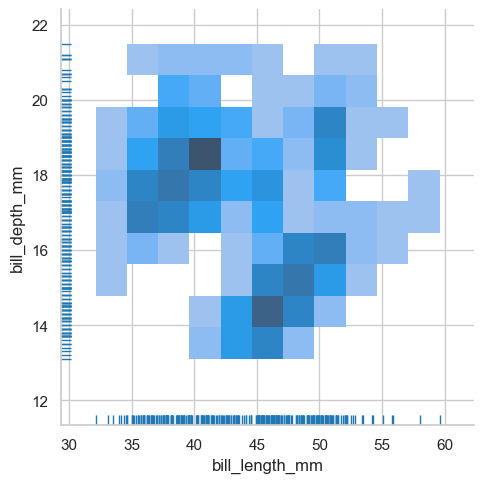

In [189]:
plt.figure(figsize=t)

sns.displot(
    data=pre_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True
);

<Figure size 600x600 with 0 Axes>

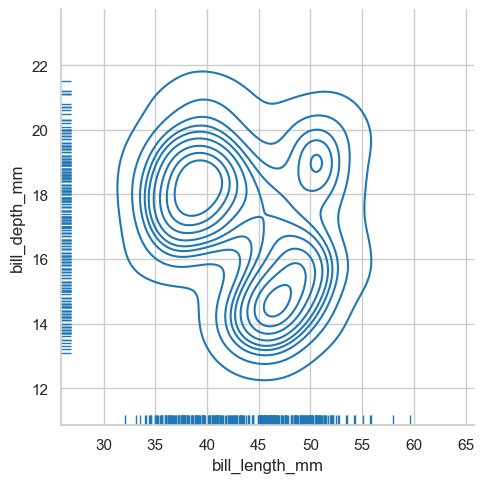

In [190]:
plt.figure(figsize=t)

sns.displot(
    data=pre_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde'
);

<Figure size 600x600 with 0 Axes>

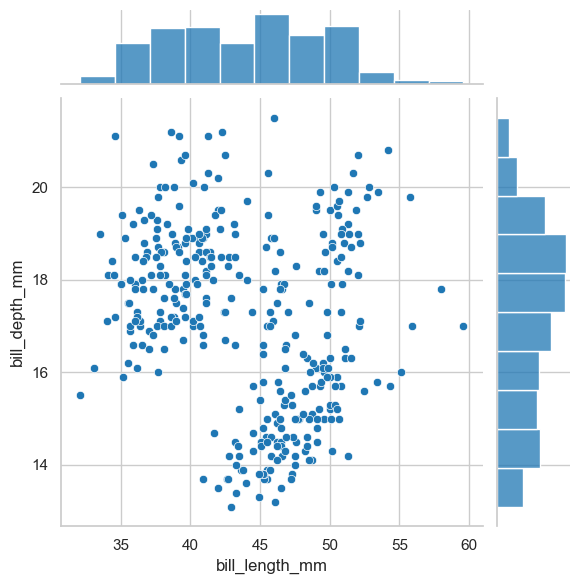

In [191]:
plt.figure(figsize=t)

sns.jointplot(
    data=pre_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm'
);

# Estableciendo relaciones: Gráficos de violín y boxplots

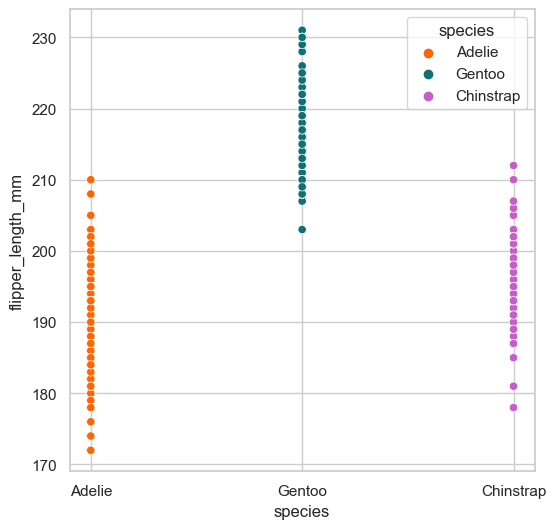

In [192]:
plt.figure(figsize=t)
sns.scatterplot(
    data=pre_penguin_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
);

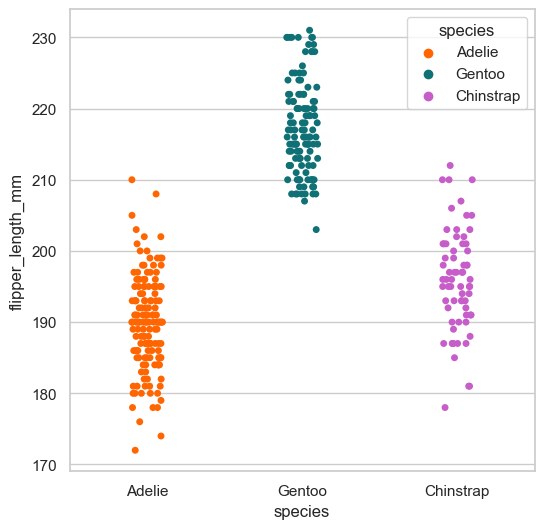

In [193]:
plt.figure(figsize=t)

sns.stripplot(
    data=pre_penguin_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
);

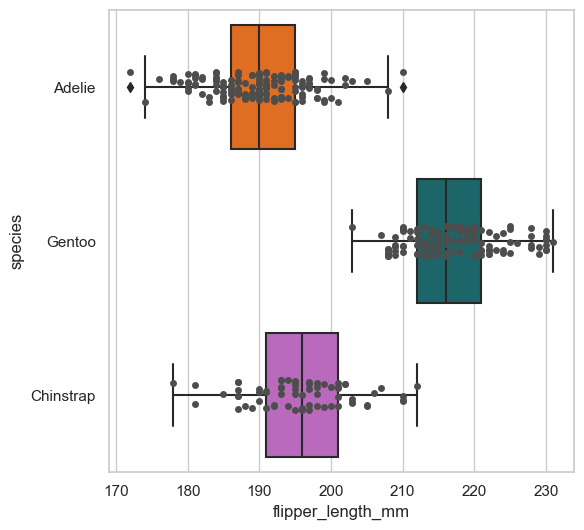

In [194]:
plt.figure(figsize=t)

ax = sns.boxplot(
    data=pre_penguin_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
)

ax = sns.stripplot(
    data=pre_penguin_df,
    x='flipper_length_mm',
    y='species',
    color='.3'
);

# se aprecian datos atipicos en la especie Adelie

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9244\911944594.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(


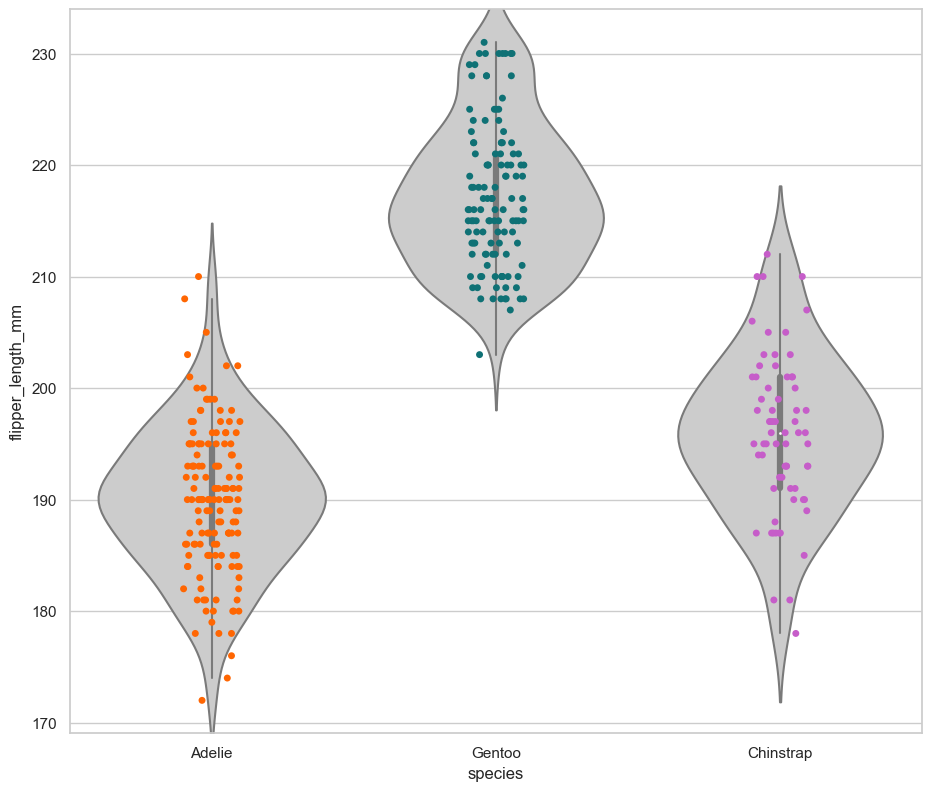

In [195]:
ax = sns.violinplot(
    data=pre_penguin_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)

ax = sns.stripplot(
    data=pre_penguin_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
);

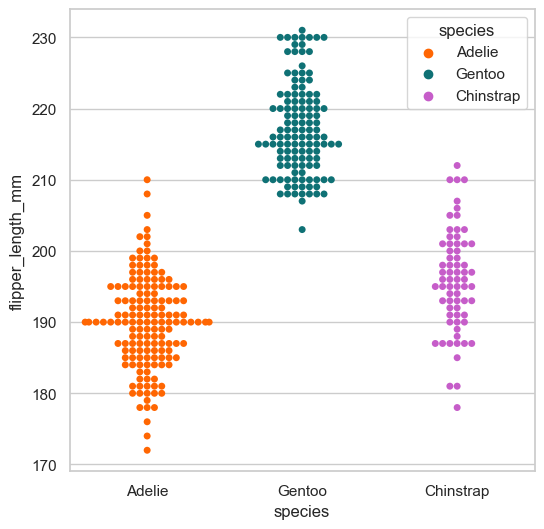

In [196]:
plt.figure(figsize=t)

sns.swarmplot(
    data=pre_penguin_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color,
    hue='species'
);

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [197]:
pre_penguin_df.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9244\1930761269.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pre_penguin_df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.0e+00,-2.4e-01,0.7,6.0e-01,5.5e-02
bill_depth_mm,-2.4e-01,1.0e+00,-0.6,-4.7e-01,-6.0e-02
flipper_length_mm,6.6e-01,-5.8e-01,1.0,8.7e-01,1.7e-01
body_mass_g,6.0e-01,-4.7e-01,0.9,1.0e+00,4.2e-02
year,5.5e-02,-6.0e-02,0.2,4.2e-02,1.0e+00


## ¿Cómo puedo visualizar los coeficientes de correlación?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9244\636740860.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=pre_penguin_df.corr(),


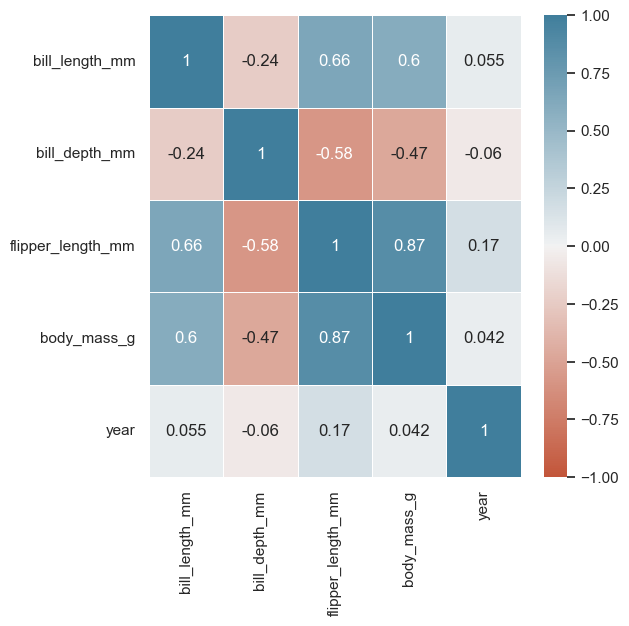

In [198]:
plt.figure(figsize=t)

sns.heatmap(
    data=pre_penguin_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
);

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9244\3004633119.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=pre_penguin_df.corr(),


<Figure size 400x400 with 0 Axes>

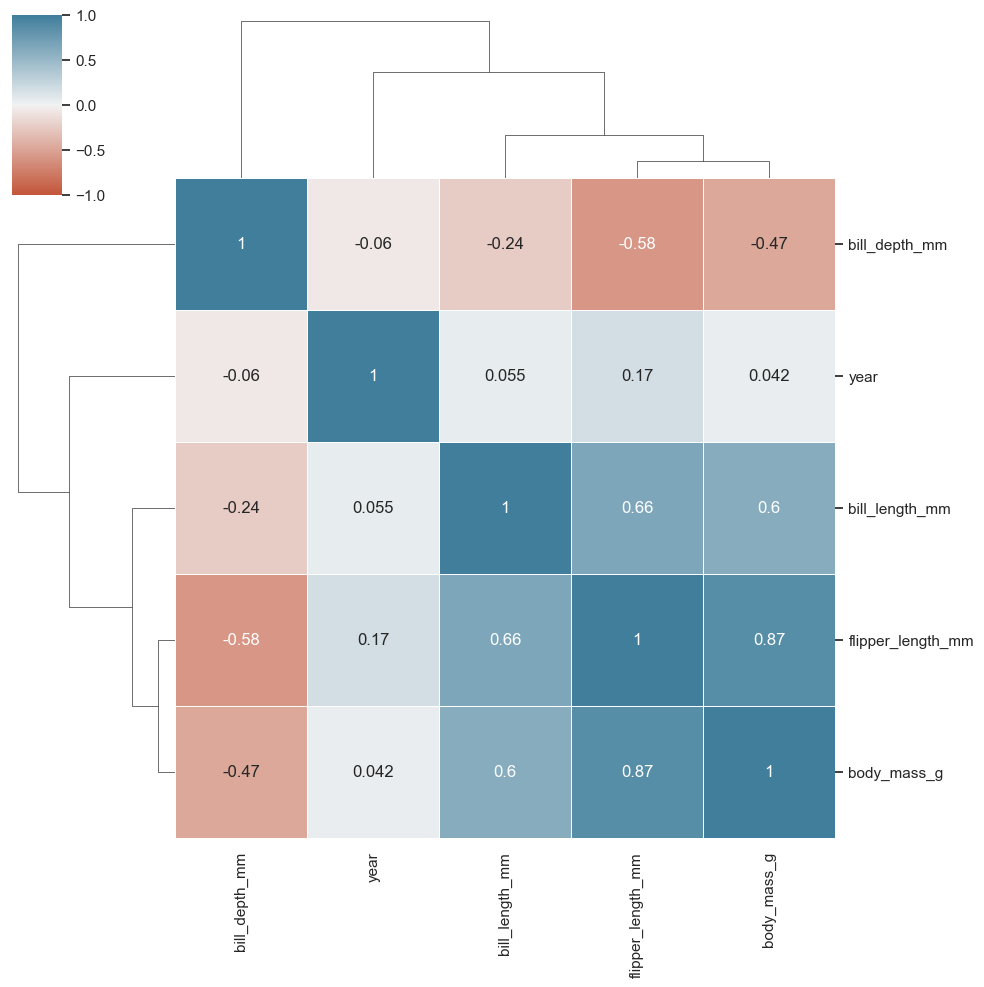

In [199]:
plt.figure(figsize=(4,4))

sns.clustermap(
    data=pre_penguin_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
);

## ¿Cómo podría representar una variable categórica como númerica discreta?

In [200]:
pre_penguin_df = (
    pre_penguin_df
    .assign(
        numeric_sex=lambda df: df.sex.replace(['female', 'male'], [0, 1])
    )
)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9244\3004633119.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=pre_penguin_df.corr(),


<Figure size 400x400 with 0 Axes>

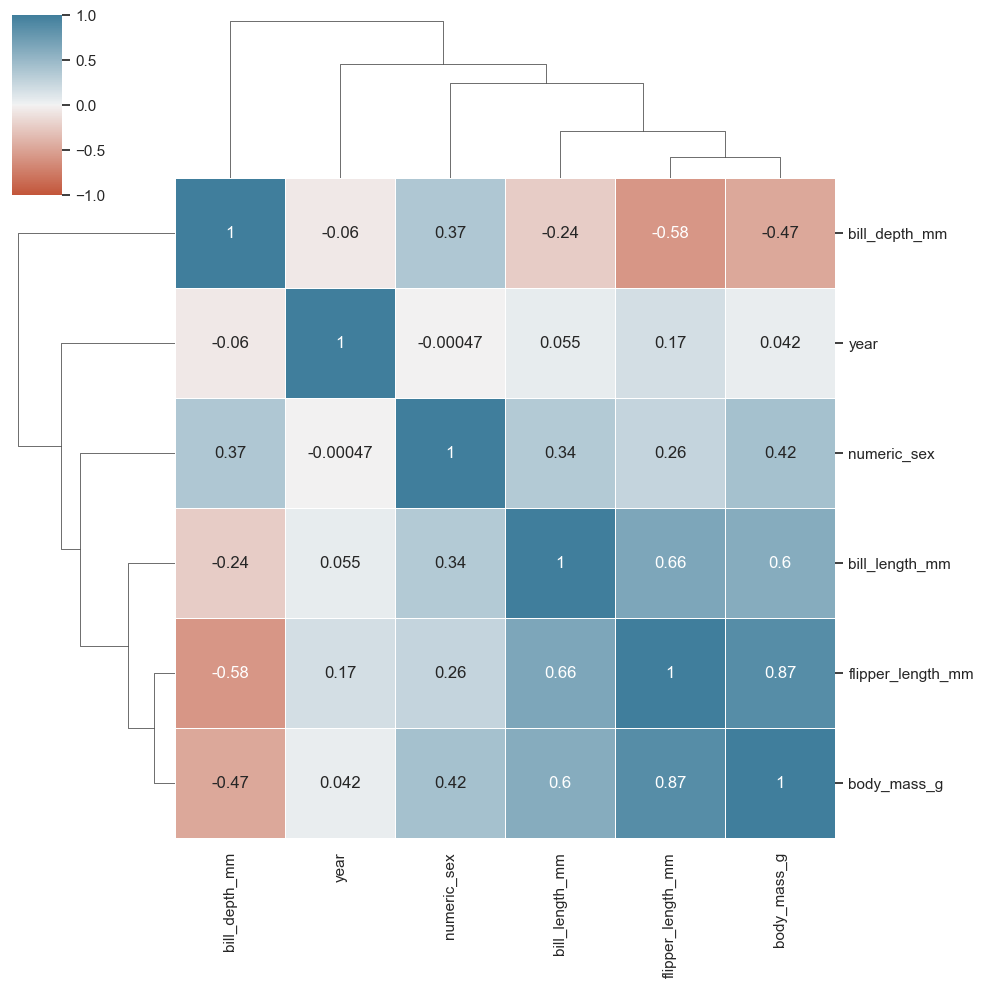

In [201]:
plt.figure(figsize=(4,4))

sns.clustermap(
    data=pre_penguin_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
);

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

array([[1.        , 0.91657982],
       [0.91657982, 1.        ]])

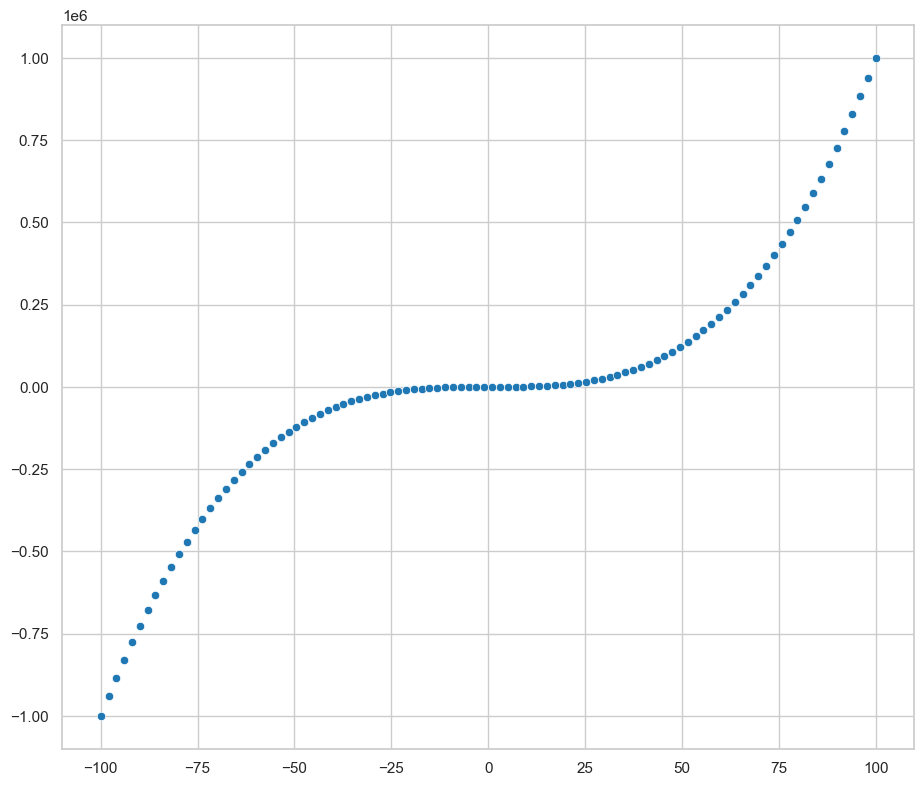

In [202]:
x = np.linspace(-100, 100, 100)
y = x**3
y += np.random.normal(0, 100, x.size)

sns.scatterplot(
    x=x,
    y=y
)

np.corrcoef(x, y)

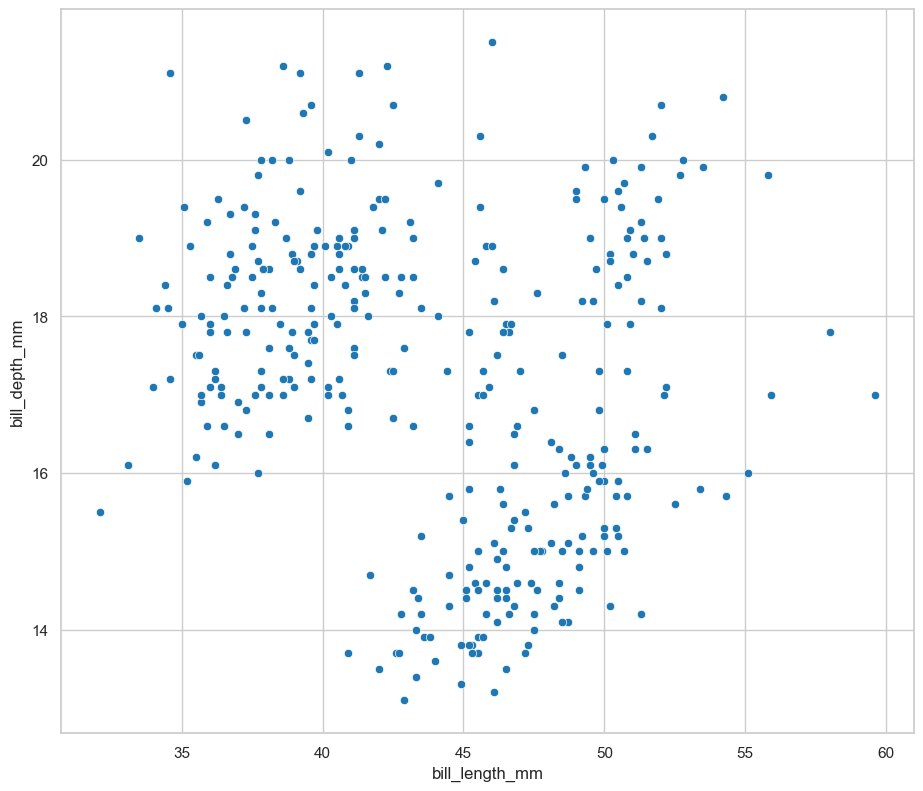

In [203]:
sns.scatterplot(
    data=pre_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm'
);

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


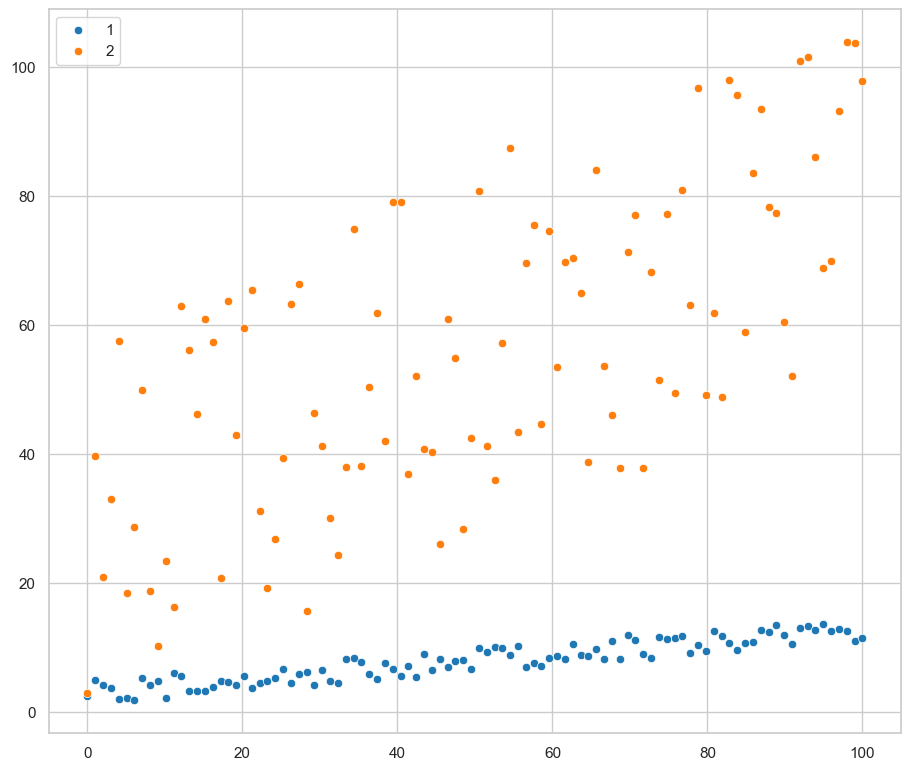

In [204]:
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

# Estableciendo relaciones: Análisis de regresión simple

In [205]:
res_1 = scipy.stats.linregress(
    x=x_1,
    y=y_1
)
res_2 = scipy.stats.linregress(
    x=x_2,
    y=y_2
)

print(res_1, res_2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


1. Slope = El cammbio que representan el conjunto de datos, respecto al cambio de x.
Si vemos el "res_2" el slope es mayor y por ende no debemos fijarnos solo en el coef de correlación (que es mayor en res_1), pero res_2 ofrece un mayor imapacto.
2. rvalue = r también corrobora lo anterior.

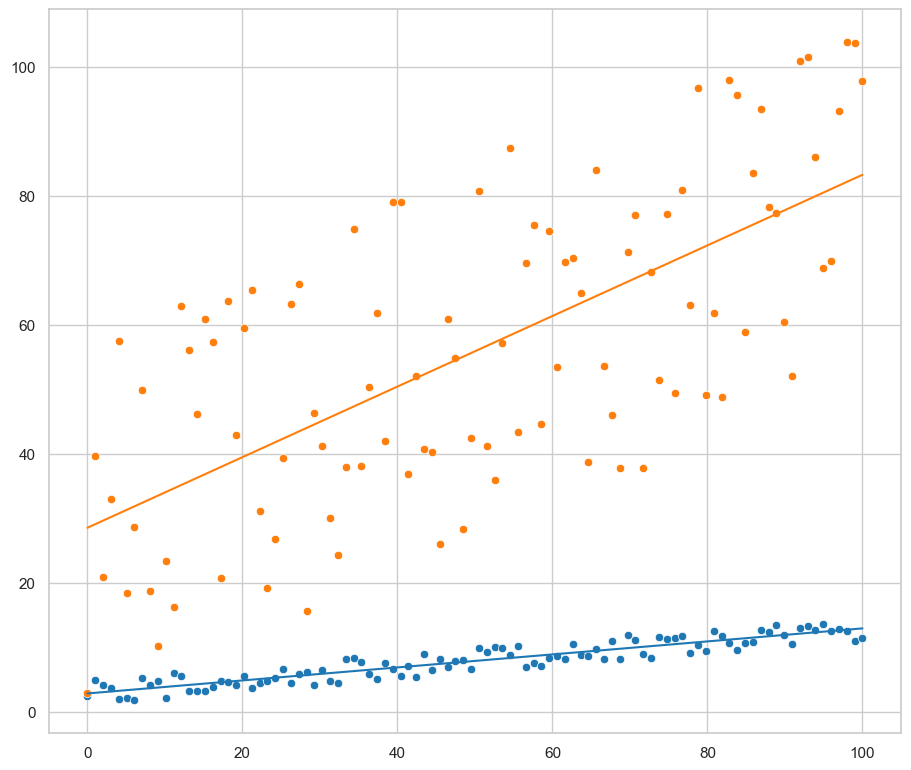

In [206]:
sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 = res_1.intercept + res_1.slope * fx_1

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 = res_2.intercept + res_2.slope * fx_2

plt.plot(fx_2, fy_2)


In [207]:
# limpiar valores en blanco 

# validar si existen:
print(pre_penguin_df.isna().sum())

# ahora si limpiar =

pre_penguin_df = pre_penguin_df.dropna(subset=['bill_length_mm', 'bill_depth_mm'])


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
numeric_sex          11
dtype: int64


LinregressResult(slope=-0.08502128077717654, intercept=20.88546831853275, rvalue=-0.23505287035553257, pvalue=1.1196621961373535e-05, stderr=0.019066944825560005, intercept_stderr=0.8438832083314671)


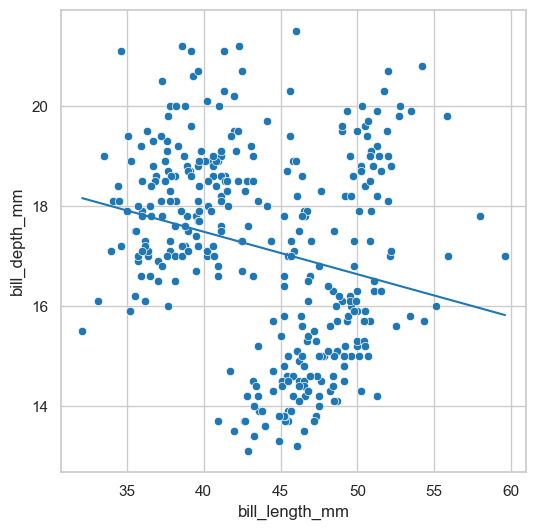

In [208]:
plt.figure(figsize=t)

x=pre_penguin_df.bill_length_mm
y=pre_penguin_df.bill_depth_mm

sns.scatterplot(
    data=pre_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_pinguinos = scipy.stats.linregress(
    x=x,
    y=y
)

print(res_pinguinos)

fx_1 = np.array([x.min(), x.max()])
fy_1 = res_pinguinos.intercept + res_pinguinos.slope * fx_1

plt.plot(fx_1, fy_1)

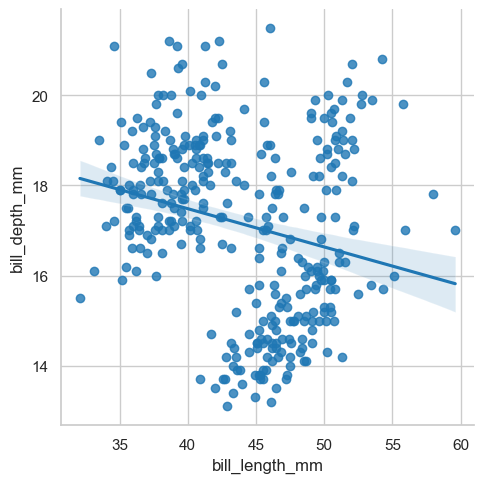

In [209]:
# lo mismo de antes pero más breve (no me da data, pero si el objeto visual) =

sns.lmplot(
    data=pre_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

In [210]:
x = pre_penguin_df.bill_length_mm
y = pre_penguin_df.bill_depth_mm

# modelo de regresión lineal:

res_x_contra_y = scipy.stats.linregress(x=x, y=y)
res_y_contra_x = scipy.stats.linregress(x=y, y=x)

print(res_x_contra_y, res_y_contra_x, sep='\n')

LinregressResult(slope=-0.08502128077717654, intercept=20.88546831853275, rvalue=-0.23505287035553257, pvalue=1.1196621961373535e-05, stderr=0.019066944825560005, intercept_stderr=0.8438832083314671)
LinregressResult(slope=-0.6498355630183154, intercept=55.06736977191969, rvalue=-0.23505287035553257, pvalue=1.1196621961373535e-05, stderr=0.14573267671925105, intercept_stderr=2.5159514161568546)


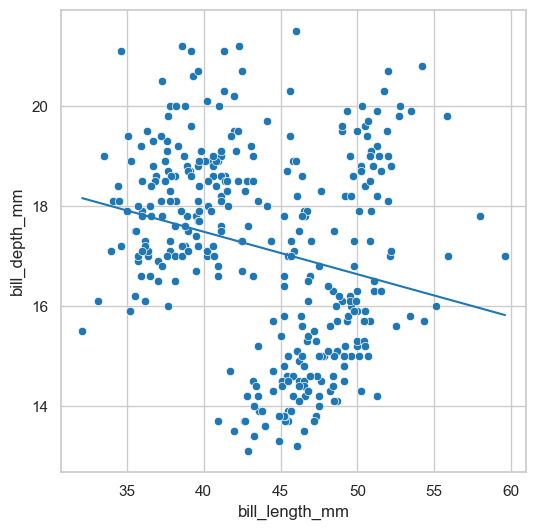

In [211]:
plt.figure(figsize=t)

sns.scatterplot(
x=x,
y=y
)

fx_1= np.array([x.min(), x.max()])
fy_1= res_x_contra_y.intercept + res_x_contra_y.slope * fx_1

plt.plot(fx_1, fy_1);

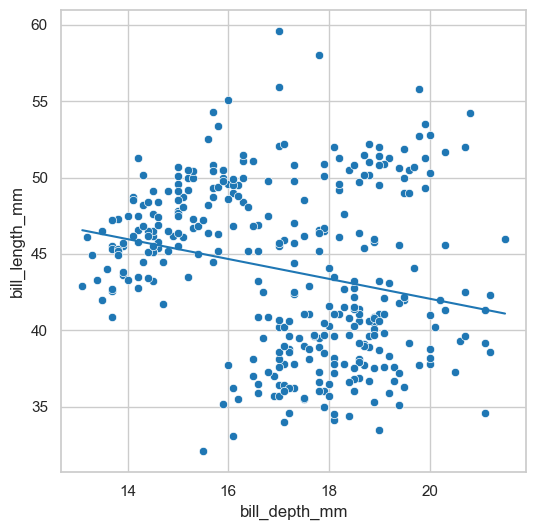

In [212]:
plt.figure(figsize=t)

sns.scatterplot(
x=y,
y=x
)

fx_2= np.array([y.min(), y.max()])
fy_2= res_y_contra_x.intercept + res_y_contra_x.slope * fx_2

plt.plot(fx_2, fy_2);

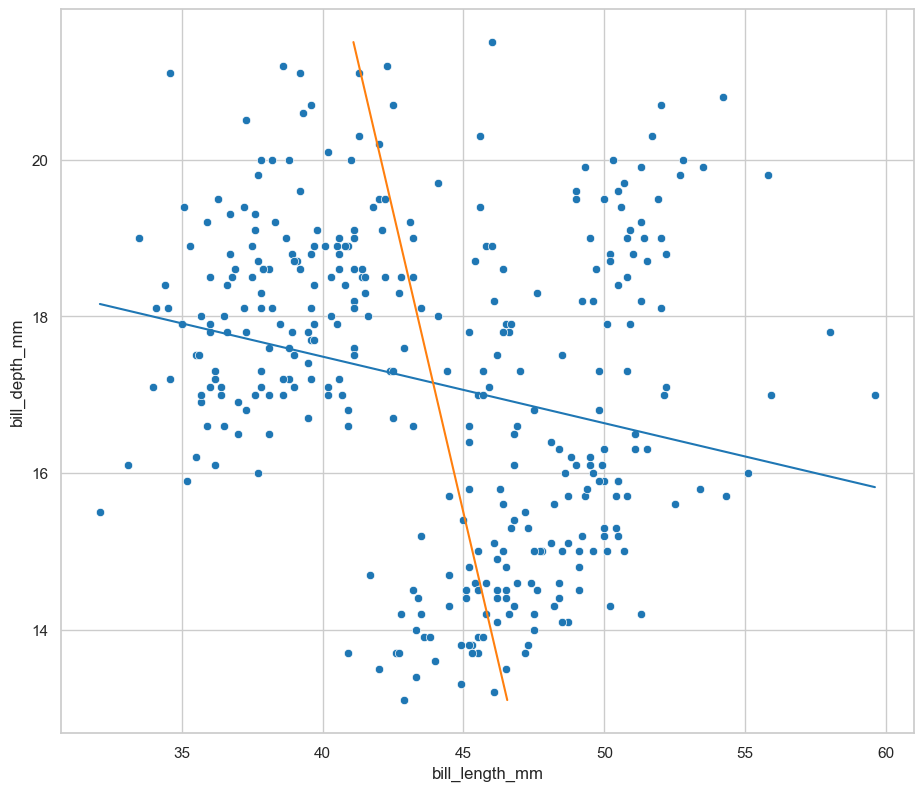

In [213]:
sns.scatterplot(
x=x,
y=y
)
plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2);

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [214]:
# regresión lineal multiple
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm',
        data=pre_penguin_df
    )
    .fit()
    .params
)

Intercept        55.1
bill_depth_mm    -0.6
dtype: float64

In [215]:
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm',
        data=pre_penguin_df
    )
    .fit()
    .params
)

Intercept         2.1e+01
bill_length_mm   -8.5e-02
dtype: float64

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

In [216]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=pre_penguin_df
    )
    .fit()
)

model_1.summary()  #descripcion del modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     186.4
Date:                Sun, 14 May 2023   Prob (F-statistic):           3.81e-34
Time:                        16:37:22   Log-Likelihood:                -2697.0
No. Observations:                 342   AIC:                             5398.
Df Residuals:                     340   BIC:                             5406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        362.3067    283.345      1.279      0.202    -195.024     919.637
bill_length_mm    87.4153      6.402     13.654      0.000      74.823     100.008
==============================================================================
Omnibus:                        5.671   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.857
Skew:                          -0.211   Prob(JB):                       0.0882
Kurtosis:                       2.597   Cond. No.                         359.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lo importante antes, es la pendiente. (87,4153)

#### Modelo 2

In [217]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=pre_penguin_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     150.8
Date:                Sun, 14 May 2023   Prob (F-statistic):           1.40e-47
Time:                        16:37:22   Log-Likelihood:                -2662.9
No. Observations:                 342   AIC:                             5332.
Df Residuals:                     339   BIC:                             5343.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3343.1359    429.912      7.776      0.000    2497.504    4188.768
bill_length_mm    75.2808      5.971     12.608      0.000      63.537      87.025
bill_depth_mm   -142.7226     16.507     -8.646      0.000    -175.191    -110.254
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                2.019
Skew:                           0.001   Prob(JB):                        0.364
Kurtosis:                       2.624   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A mayor masa del pinguino (variable dependiente). 

#### Modelo 3

In [218]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=pre_penguin_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     359.7
Date:                Sun, 14 May 2023   Prob (F-statistic):          8.19e-105
Time:                        16:37:22   Log-Likelihood:                -2526.7
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     338   BIC:                             5077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6424.7647    561.469    -11.443      0.000   -7529.179   -5320.351
bill_length_mm        4.1618      5.329      0.781      0.435      -6.321      14.644
bill_depth_mm        20.0495     13.694      1.464      0.144      -6.887      46.986
flipper_length_mm    50.2692      2.477     20.293      0.000      45.397      55.142
==============================================================================
Omnibus:                        5.263   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.129
Skew:                           0.298   Prob(JB):                       0.0770
Kurtosis:                       3.065   Cond. No.                     5.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. R2 = 0.761 (el 3 modelo se ajusta mas respecto a los anteriores)

In [219]:
# Llenar los NaNs con un valor, como 0 o la media de la columna
pre_penguin_df = pre_penguin_df.fillna(0)

#### Modelo 4

In [220]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=pre_penguin_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     303.0
Date:                Sun, 14 May 2023   Prob (F-statistic):          3.98e-122
Time:                        16:37:22   Log-Likelihood:                -2480.0
No. Observations:                 342   AIC:                             4972.
Df Residuals:                     336   BIC:                             4995.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2281.3842    646.619     -3.528      0.000   -3553.316   -1009.452
C(sex)[T.female]    -96.2855    118.167     -0.815      0.416    -328.725     136.154
C(sex)[T.male]      435.8526    121.882      3.576      0.000     196.104     675.601
bill_length_mm       -1.7272      4.707     -0.367      0.714     -10.987       7.532
bill_depth_mm       -81.1314     15.513     -5.230      0.000    -111.647     -50.616
flipper_length_mm    38.7370      2.443     15.859      0.000      33.932      43.542
==============================================================================
Omnibus:                        1.705   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.601
Skew:                           0.074   Prob(JB):                        0.449
Kurtosis:                       2.699   Cond. No.                     7.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# el modelo de regresión multiple, nos deja colocar variables categoricas de forma más sencilla.

1. R2 = 0.823 vuelve a subir, obtiene mejor la variabilidad de nuestros datos.
2. La pendiente nos dice que los machos pesan 541 gr más que las hembras. C(sex)[T.male]	541.0285

#### Modelo 5

In [221]:
# modelo más sencillo para progresar más rápido:


model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=pre_penguin_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     459.8
Date:                Sun, 14 May 2023   Prob (F-statistic):          6.46e-119
Time:                        16:37:23   Log-Likelihood:                -2493.8
No. Observations:                 342   AIC:                             4996.
Df Residuals:                     338   BIC:                             5011.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5260.6550    307.030    -17.134      0.000   -5864.586   -4656.724
C(sex)[T.female]    -67.0874    122.341     -0.548      0.584    -307.733     173.558
C(sex)[T.male]      283.7505    122.513      2.316      0.021      42.767     524.734
flipper_length_mm    46.5639      1.422     32.745      0.000      43.767      49.361
==============================================================================
Omnibus:                        0.290   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.406
Skew:                           0.051   Prob(JB):                        0.816
Kurtosis:                       2.865   Cond. No.                     3.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

r2 = 0.8 (que es bueno según el profe, no sé por qué)
1. Un cambio en la longitud de la aleta (flipper_length_mm), representa 46.9 gramos más de peso (flipper_length_mm	46.9822)

### Visualizando resultados

#### Creación de tabla de resultados

In [222]:
# correción porque todas las listas deben tener la misma longitud: 

print(len(pre_penguin_df.body_mass_g))
print(len(model_1.predict()))
print(len(model_2.predict()))
print(len(model_3.predict()))
print(len(model_4.predict())) # problema 1 (se corrigió arriba con el ajuste de 0 en lugar de Null)
print(len(model_5.predict())) # problema 2 (se corrigió arriba con el ajuste de 0 en lugar de Null)
print(len(pre_penguin_df.species))
print(len(pre_penguin_df.sex))

342
342
342
342
342
342
342
342


In [223]:
models_result = pd.DataFrame(
    dict(
        actual_value = pre_penguin_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=pre_penguin_df.species,
        sex=pre_penguin_df.sex
    )
)

models_result.head(5)

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3780.2,3617.7,3211.6,3581.2,3451.2,Adelie,male
1,3800.0,3815.2,3833.4,3438.6,3347.5,3333.1,Adelie,female
2,3250.0,3885.1,3807.9,3906.3,3646.1,3752.2,Adelie,female
4,3450.0,3570.4,3351.4,3816.9,3469.3,3659.1,Adelie,female
5,3650.0,3797.7,3361.6,3703.0,3775.3,3870.2,Adelie,male


#### ECDFs

<AxesSubplot: ylabel='Proportion'>

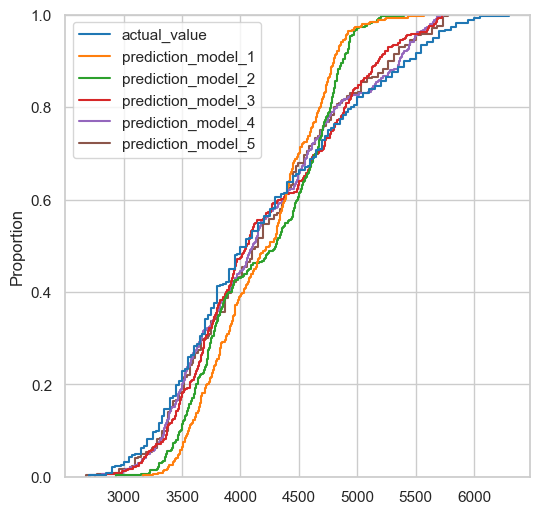

In [224]:
plt.figure(figsize=t)

sns.ecdfplot(
    data=models_result
)

<AxesSubplot: ylabel='Proportion'>

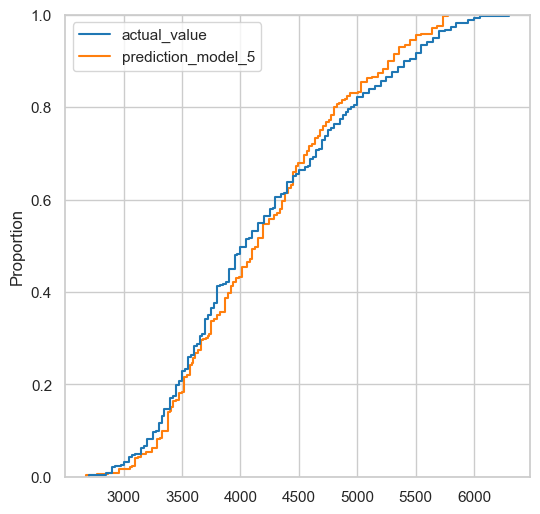

In [225]:
# tomar valor real con predicción del modelo 5

plt.figure(figsize=t)

sns.ecdfplot(
    data=models_result.select_columns(['actual_value', 'prediction_model_5'])
)

#### PDFs

<AxesSubplot: ylabel='Density'>

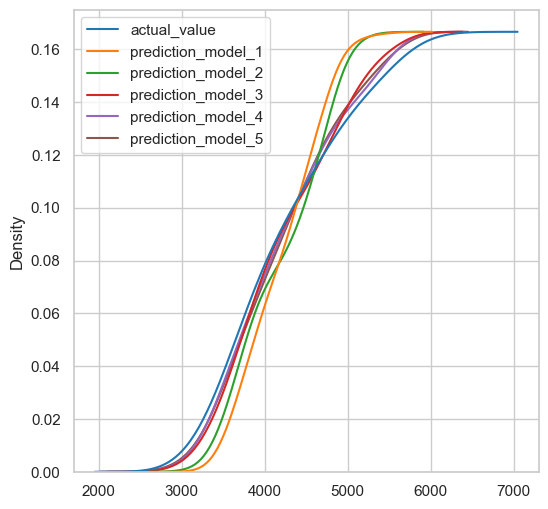

In [226]:
plt.figure(figsize=t)
sns.kdeplot(
    data=models_result,
    cumulative=True #genera curvas suavizadas de tipo acumulativas
)

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

<Figure size 600x600 with 0 Axes>

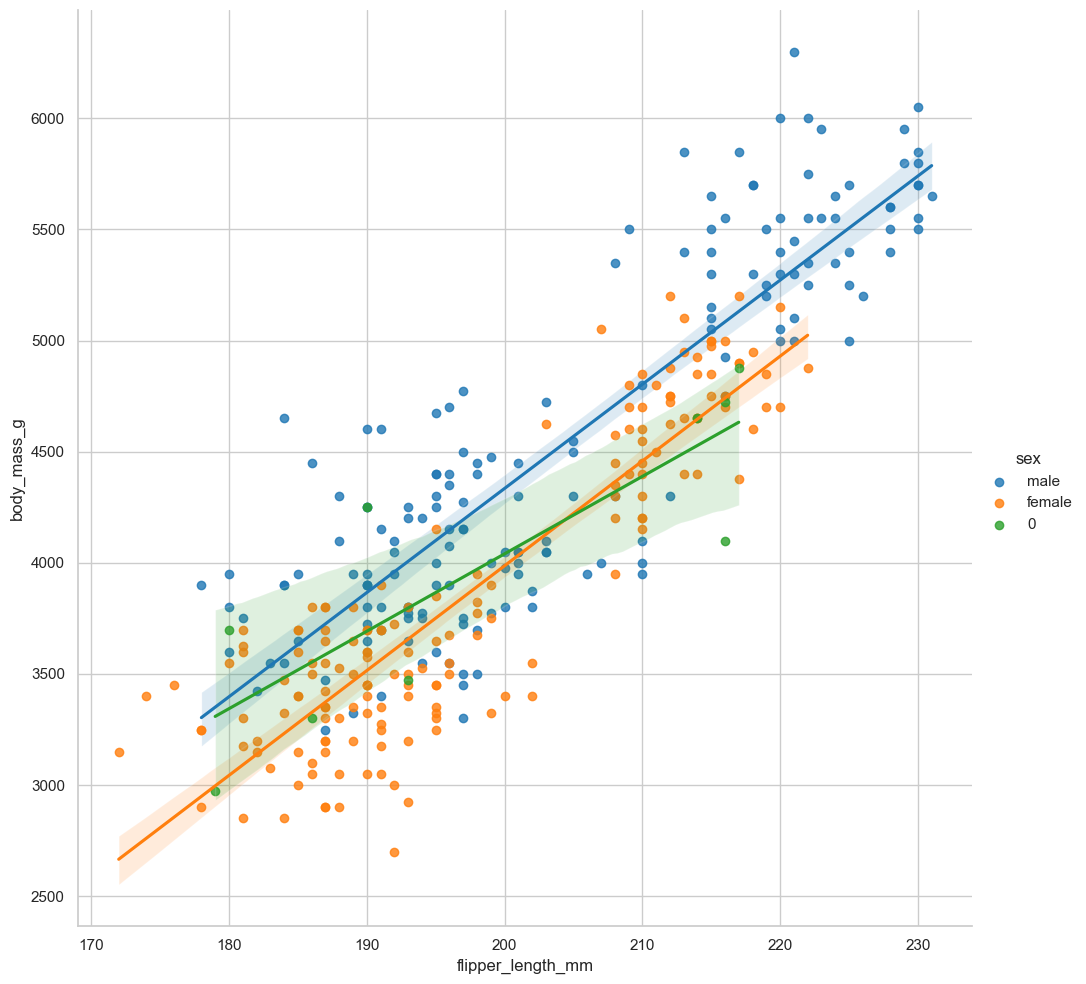

In [227]:
plt.figure(figsize=t)
sns.lmplot(
    data=pre_penguin_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

In [228]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=pre_penguin_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.366325
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  342
Model:                          Logit   Df Residuals:                      336
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 May 2023   Pseudo R-squ.:                  0.4714
Time:                        16:37:24   Log-Likelihood:                -125.28
converged:                       True   LL-Null:                       -237.00
Covariance Type:            nonrobust   LLR p-value:                 2.721e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -59.9812      6.694     -8.960      0.000     -73.101     -46.861
C(island)[T.Dream]        -1.4940      0.486     -3.072      0.002      -2.447      -0.541
C(island)[T.Torgersen]    -1.1906      0.587     -2.028      0.043      -2.341      -0.040
flipper_length_mm          0.1350      0.023      5.837      0.000       0.090       0.180
bill_length_mm             0.1409      0.044      3.196      0.001       0.054       0.227
bill_depth_mm              1.6023      0.178      8.996      0.000       1.253       1.951
==========================================================================================
"""

## Exploración de nuestras variables categóricas

In [229]:
(
    pre_penguin_df
    .value_counts(['island', 'sex'])
    .reset_index(name='count')
)

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23
6,Biscoe,0,4
7,Torgersen,0,4
8,Dream,0,1


## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

In [230]:
pre_penguin_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [231]:
pre_penguin_df = (
    pre_penguin_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'],[1,0,0]))
)

In [232]:
model_is_adele = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=pre_penguin_df
).fit()

Optimization terminated successfully.
         Current function value: 0.347286
         Iterations 8


In [233]:
model_is_adele.params #muestra solo los parametros del modelo

Intercept            43.2
C(sex)[T.female]     -1.9
C(sex)[T.male]       -0.6
flipper_length_mm    -0.2
dtype: float64

In [234]:
is_adelie_df_prediction = pd.DataFrame(
    dict(
        actual_adelie = pre_penguin_df.is_adelie,
        predicted_values = model_is_adele.predict().round()  #round indica solo si es cero o uno
    )
)

is_adelie_df_prediction

,actual_adelie,predicted_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
339,0,0.0
340,0,0.0
341,0,1.0
342,0,0.0


In [235]:
(
    is_adelie_df_prediction
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name='count')
)

,actual_adelie,predicted_values,count
0,0,0.0,155
1,1,1.0,134
2,0,1.0,36
3,1,0.0,17


In [236]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_prediction.actual_adelie,
        is_adelie_df_prediction.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_prediction.actual_adelie,
    is_adelie_df_prediction.predicted_values
)

[[155  36]
 [ 17 134]]


0.8450292397660819

# Paradoja de Simpson

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

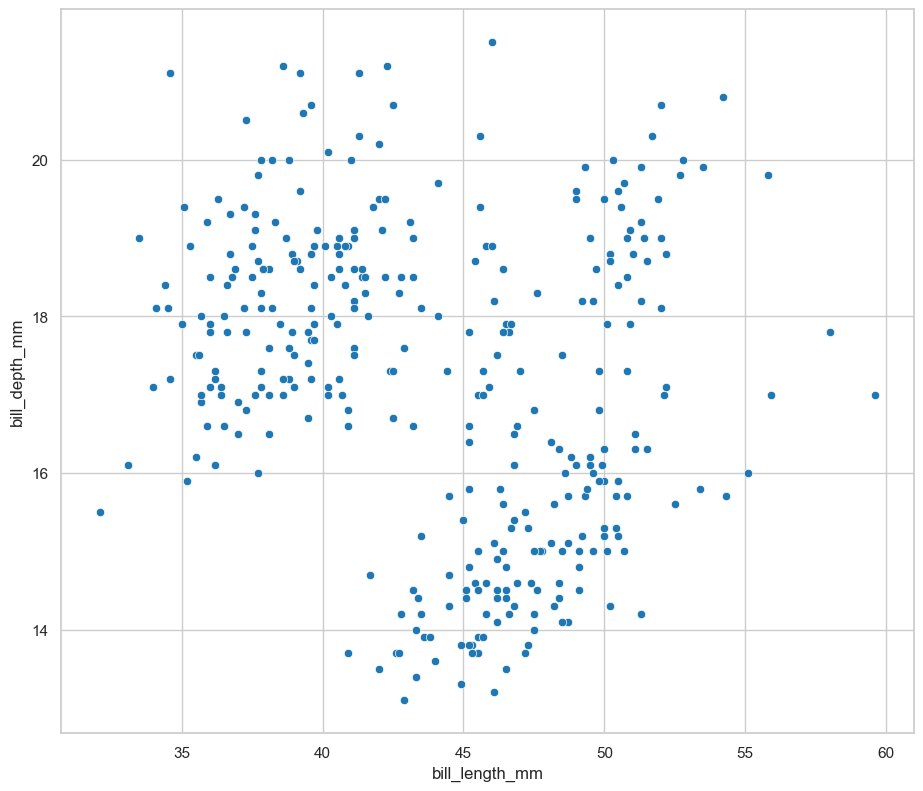

In [238]:
sns.scatterplot(
    data=pre_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

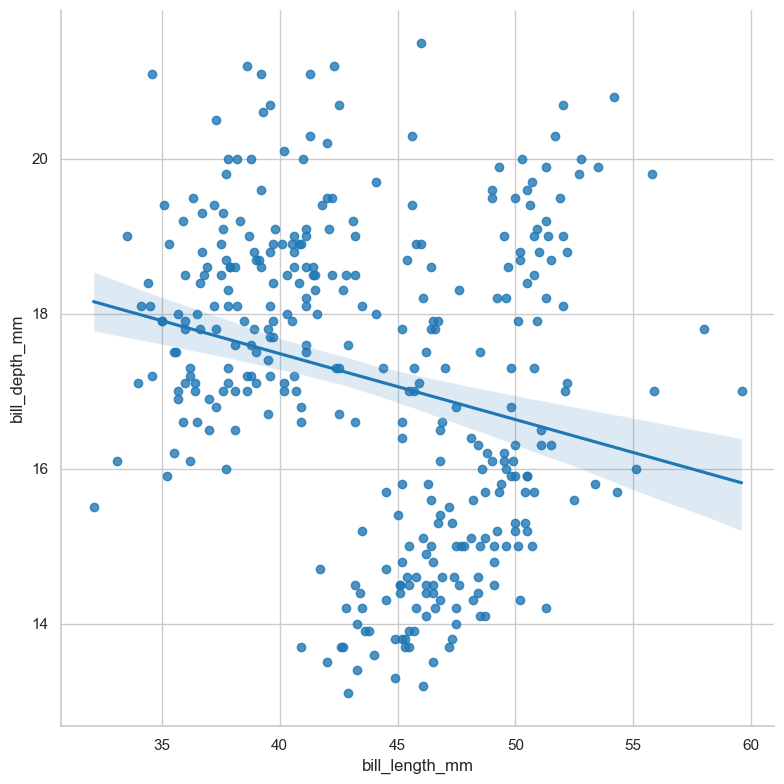

In [242]:
# luego regresión lineal simple:
sns.lmplot(
    data=pre_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=8
)


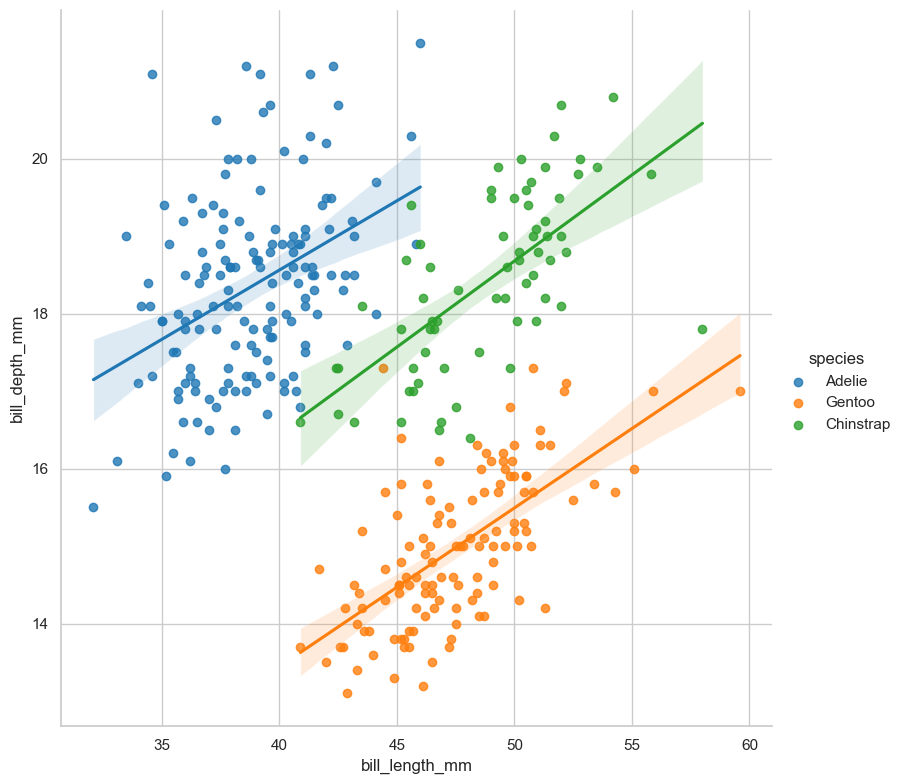

In [243]:
# luego regresión lineal simple:
sns.lmplot(
    data=pre_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=8
)

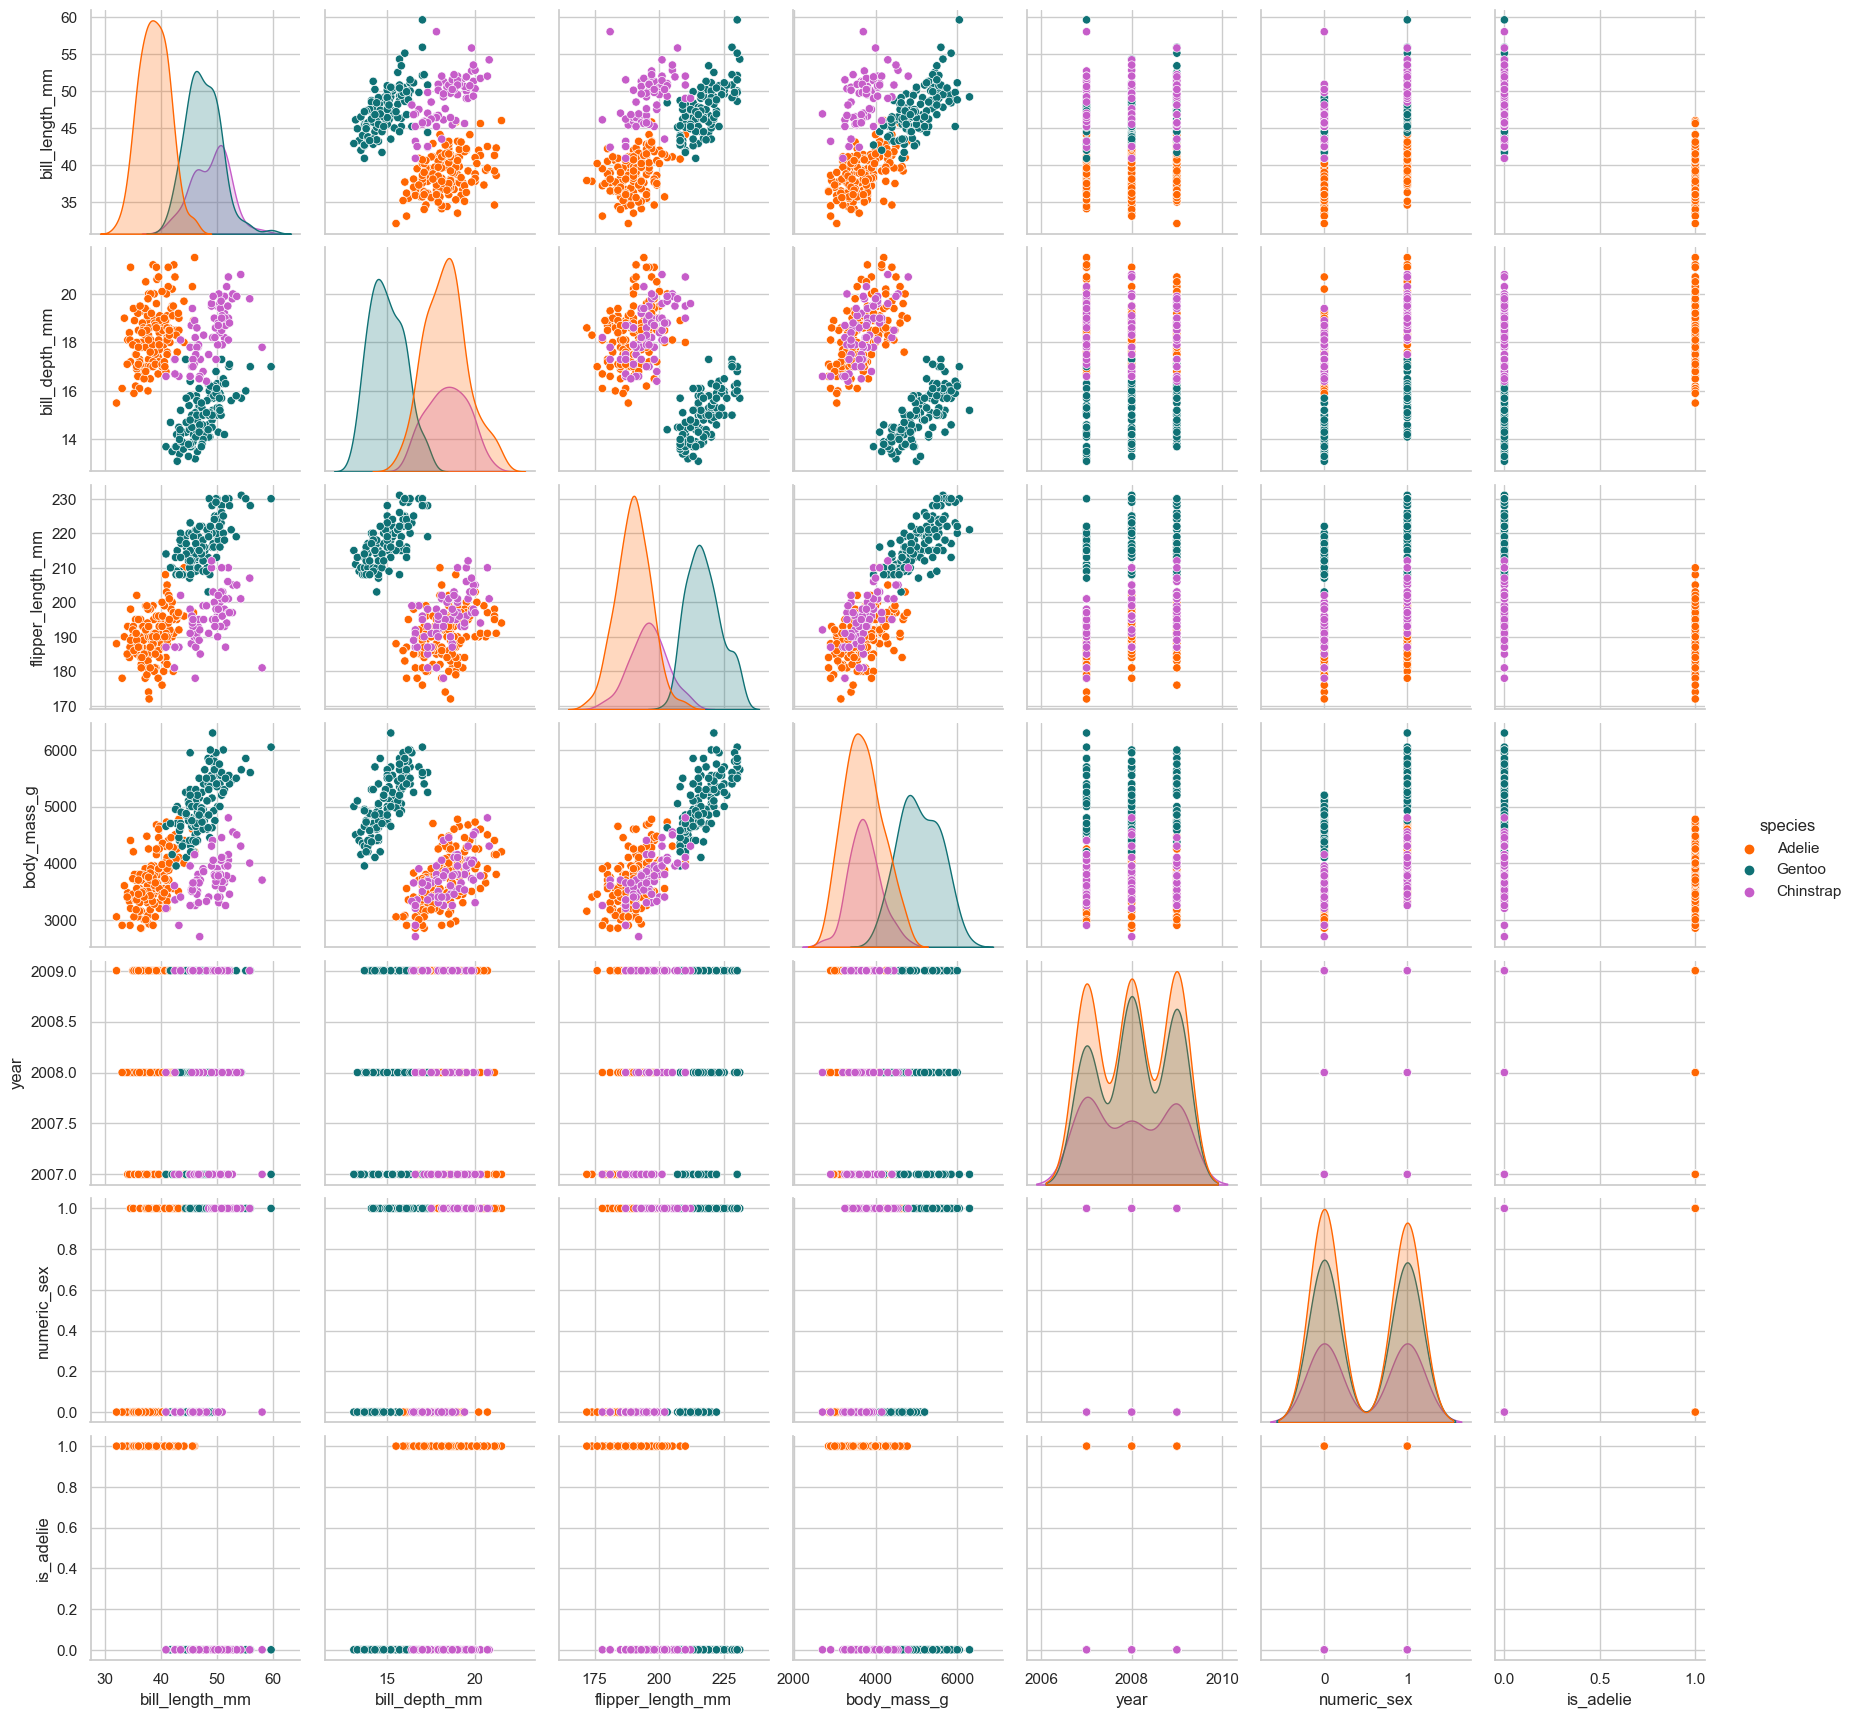

In [244]:
# exploración a la pepa (por donde hay que empezar):

sns.pairplot(
    data=pre_penguin_df,
    hue='species',
    palette=penguin_color
)

## Información de sesión

In [237]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb8b09fe-58e5-4e41-98af-4532009b73b8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>